<a href="https://colab.research.google.com/github/Mithundutta/Time-series-forecastion-of-air-qaulity/blob/main/AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
pip install pystan==2.19.1.1 prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436389 sha256=92869ae18741470de6be1f03f24336ab4ee8df0df4a32f8452e009aecdf51476
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988bdaa
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdstanpy-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.2 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [37]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import plotly as py
warnings.filterwarnings("ignore")

In [38]:
data = pd.read_csv("AQI.csv")
# Check the first 5 elements of the dataframe
data.head()

,#,Date,AVG USAQI
0,1,2022-04-05,105.3
1,2,2022-04-06,97.7
2,3,2022-04-07,110.2
3,4,2022-04-08,117.4
4,5,2022-04-09,73.3


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   #          312 non-null    int64  
 1   Date       312 non-null    object 
 2   AVG USAQI  312 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.4+ KB


In [40]:
# Check if the the data is set up in proper format and then start modeling/forecasting. 
data.dtypes

#              int64
Date          object
AVG USAQI    float64
dtype: object

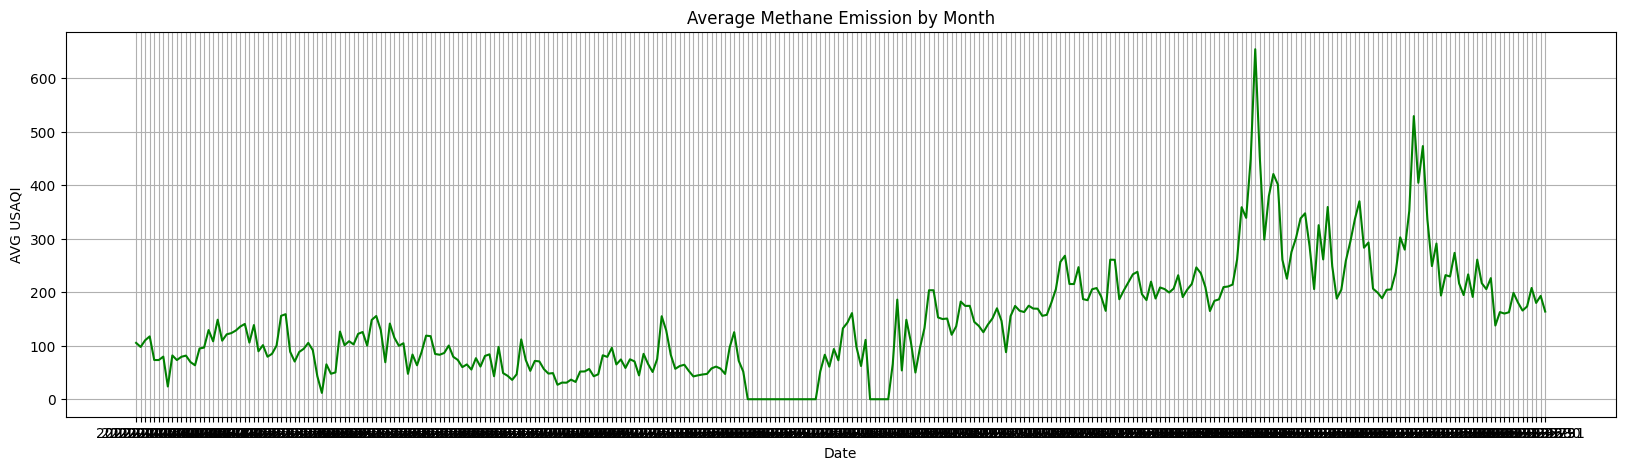

In [41]:
#Visualize the dataframe i.e.Methane emissions 
plt.figure(figsize=(20,5))
sns.lineplot(data=data, x="Date", y="AVG USAQI", color='green')
plt.title("Average Methane Emission by Month")
plt.grid(True)
plt.show()

In [42]:
datanew=data.copy()
datanew

,#,Date,AVG USAQI
0,1,2022-04-05,105.3
1,2,2022-04-06,97.7
2,3,2022-04-07,110.2
3,4,2022-04-08,117.4
4,5,2022-04-09,73.3
...,...,...,...
307,308,2023-03-27,173.3
308,309,2023-03-28,207.9
309,310,2023-03-29,179.9
310,311,2023-03-30,193.1


In [87]:
datanew.head()

,#,ds,y,month,ds
0,1,2022-04-05,105.3,4,2022
1,2,2022-04-06,97.7,4,2022
2,3,2022-04-07,110.2,4,2022
3,4,2022-04-08,117.4,4,2022
4,5,2022-04-09,73.3,4,2022


In [88]:
datanew['month'] = pd.DatetimeIndex(datanew['Date']).month

KeyError: ignored

In [45]:
datanew['year'] = pd.DatetimeIndex(datanew['Date']).year

In [46]:
datanew.head()

,#,Date,AVG USAQI,month,year
0,1,2022-04-05,105.3,4,2022
1,2,2022-04-06,97.7,4,2022
2,3,2022-04-07,110.2,4,2022
3,4,2022-04-08,117.4,4,2022
4,5,2022-04-09,73.3,4,2022


In [47]:
datanew_2022=datanew[datanew["year"] == 2022]

In [61]:
datanew_2022.head()

,#,Date,AVG USAQI,month,year
0,1,2022-04-05,105.3,4,2022
1,2,2022-04-06,97.7,4,2022
2,3,2022-04-07,110.2,4,2022
3,4,2022-04-08,117.4,4,2022
4,5,2022-04-09,73.3,4,2022


In [62]:
datanew_2022.tail()

,#,Date,AVG USAQI,month,year
217,218,2022-12-27,186.8,12,2022
218,219,2022-12-28,203.4,12,2022
219,220,2022-12-29,218.2,12,2022
220,221,2022-12-30,233.4,12,2022
221,222,2022-12-31,238.1,12,2022


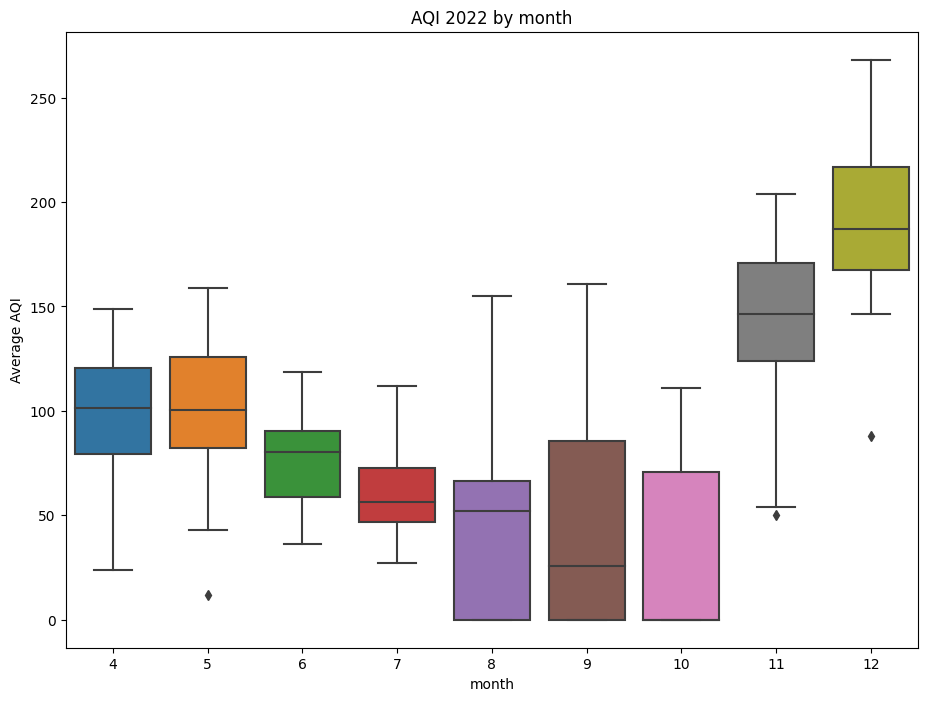

In [63]:
fig, ax = plt.subplots(figsize=(11, 8))

sns.boxplot(data=datanew_2022, x='month', y='AVG USAQI', ax=ax)

ax.set_title('AQI 2022 by month')

ax.set_ylabel('Average AQI');

In [23]:
datanew_2023=datanew[datanew["year"] == 2023]

In [65]:
datanew_2023.head()

,#,Date,AVG USAQI,month,year
222,223,2023-01-01,196.2,1,2023
223,224,2023-01-02,185.2,1,2023
224,225,2023-01-03,219.7,1,2023
225,226,2023-01-04,188.2,1,2023
226,227,2023-01-05,208.8,1,2023


In [66]:
datanew_2023.tail()

,#,Date,AVG USAQI,month,year
307,308,2023-03-27,173.3,3,2023
308,309,2023-03-28,207.9,3,2023
309,310,2023-03-29,179.9,3,2023
310,311,2023-03-30,193.1,3,2023
311,312,2023-03-31,163.8,3,2023


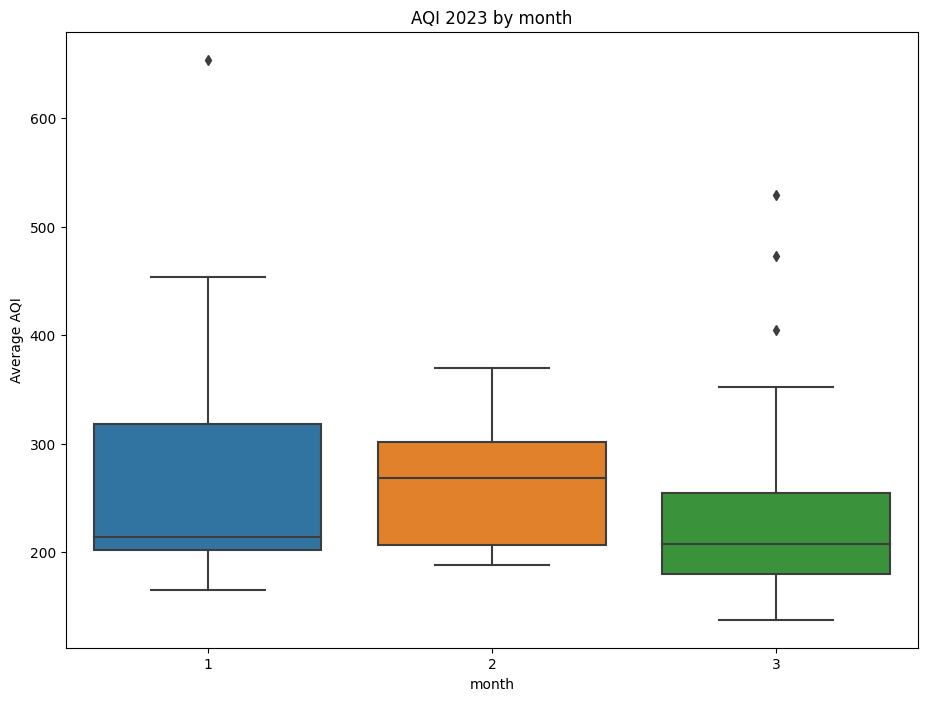

In [85]:
fig, ax = plt.subplots(figsize=(11, 8))

sns.boxplot(data=datanew_2023, x='month', y='AVG USAQI', ax=ax)

ax.set_title('AQI 2023 by month')

ax.set_ylabel('Average AQI');

In [81]:
#datanew.rename({'Date': 'DS'}, axis=1, inplace=True)

In [82]:
#datanew.rename({'DS': 'ds'}, axis=1, inplace=True)

In [83]:
#datanew.rename({'AVG USAQI': 'y'}, axis=1, inplace=True)

In [86]:
datanew.columns

Index(['#', 'ds', 'y', 'month', 'ds'], dtype='object')

In [72]:
datanew.columns = ['#', 'Date', 'y', 'month', 'ds']
model = Prophet()
model.fit(datanew)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [79]:
future = model.make_future_dataframe(periods= 12, freq='m')

In [80]:
future.tail(12)


,ds
2,1970-01-31 00:00:00.000002023
3,1970-02-28 00:00:00.000002023
4,1970-03-31 00:00:00.000002023
5,1970-04-30 00:00:00.000002023
6,1970-05-31 00:00:00.000002023
7,1970-06-30 00:00:00.000002023
8,1970-07-31 00:00:00.000002023
9,1970-08-31 00:00:00.000002023
10,1970-09-30 00:00:00.000002023
11,1970-10-31 00:00:00.000002023


In [75]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
21,1971-08-31 00:00:00.000002023,-8013.697923,-8106.377030,-7920.954353,-8013.697923,-8013.697923,0.0,0.0,0.0,0.0,0.0,0.0,-8013.697923
22,1971-09-30 00:00:00.000002023,-8000.464177,-8094.803175,-7909.201896,-8000.464177,-8000.464177,0.0,0.0,0.0,0.0,0.0,0.0,-8000.464177
23,1971-10-31 00:00:00.000002023,-7986.789307,-8074.656924,-7891.719456,-7986.789307,-7986.789307,0.0,0.0,0.0,0.0,0.0,0.0,-7986.789307
24,1971-11-30 00:00:00.000002023,-7973.555562,-8058.328589,-7882.158865,-7973.555562,-7973.555562,0.0,0.0,0.0,0.0,0.0,0.0,-7973.555562
25,1971-12-31 00:00:00.000002023,-7959.880691,-8052.400958,-7877.060876,-7959.880691,-7959.880691,0.0,0.0,0.0,0.0,0.0,0.0,-7959.880691


In [76]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(12)

,ds,yhat,yhat_lower,yhat_upper
14,1971-01-31 00:00:00.000002023,-8107.216390,-8195.726829,-8018.983101
15,1971-02-28 00:00:00.000002023,-8094.864895,-8188.890298,-8008.231726
16,1971-03-31 00:00:00.000002023,-8081.190024,-8170.627450,-7985.648774
17,1971-04-30 00:00:00.000002023,-8067.956279,-8157.228044,-7971.183515
18,1971-05-31 00:00:00.000002023,-8054.281409,-8142.170773,-7966.330898
19,1971-06-30 00:00:00.000002023,-8041.047663,-8130.632308,-7955.755922
20,1971-07-31 00:00:00.000002023,-8027.372793,-8122.018988,-7941.718802
21,1971-08-31 00:00:00.000002023,-8013.697923,-8106.377030,-7920.954353
22,1971-09-30 00:00:00.000002023,-8000.464177,-8094.803175,-7909.201896
23,1971-10-31 00:00:00.000002023,-7986.789307,-8074.656924,-7891.719456


In [77]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01 00:00:00.000002022,-8281.460705,-8372.409117,-8184.515469,-8281.460705,-8281.460705,0.0,0.0,0.0,0.0,0.0,0.0,-8281.460705
1,1970-01-01 00:00:00.000002023,-8281.460705,-8369.917585,-8197.025749,-8281.460705,-8281.460705,0.0,0.0,0.0,0.0,0.0,0.0,-8281.460705
2,1970-01-31 00:00:00.000002023,-8268.226959,-8357.538535,-8178.372793,-8268.226959,-8268.226959,0.0,0.0,0.0,0.0,0.0,0.0,-8268.226959
3,1970-02-28 00:00:00.000002023,-8255.875464,-8346.560618,-8167.699667,-8255.875464,-8255.875464,0.0,0.0,0.0,0.0,0.0,0.0,-8255.875464
4,1970-03-31 00:00:00.000002023,-8242.200593,-8332.644749,-8154.183830,-8242.200593,-8242.200593,0.0,0.0,0.0,0.0,0.0,0.0,-8242.200593
5,1970-04-30 00:00:00.000002023,-8228.966848,-8321.857645,-8140.675915,-8228.966848,-8228.966848,0.0,0.0,0.0,0.0,0.0,0.0,-8228.966848
6,1970-05-31 00:00:00.000002023,-8215.291978,-8300.692016,-8123.543627,-8215.291978,-8215.291978,0.0,0.0,0.0,0.0,0.0,0.0,-8215.291978
7,1970-06-30 00:00:00.000002023,-8202.058232,-8288.283833,-8121.599601,-8202.058232,-8202.058232,0.0,0.0,0.0,0.0,0.0,0.0,-8202.058232
8,1970-07-31 00:00:00.000002023,-8188.383362,-8284.415588,-8096.673124,-8188.383362,-8188.383362,0.0,0.0,0.0,0.0,0.0,0.0,-8188.383362
9,1970-08-31 00:00:00.000002023,-8174.708492,-8263.267814,-8079.018899,-8174.708492,-8174.708492,0.0,0.0,0.0,0.0,0.0,0.0,-8174.708492


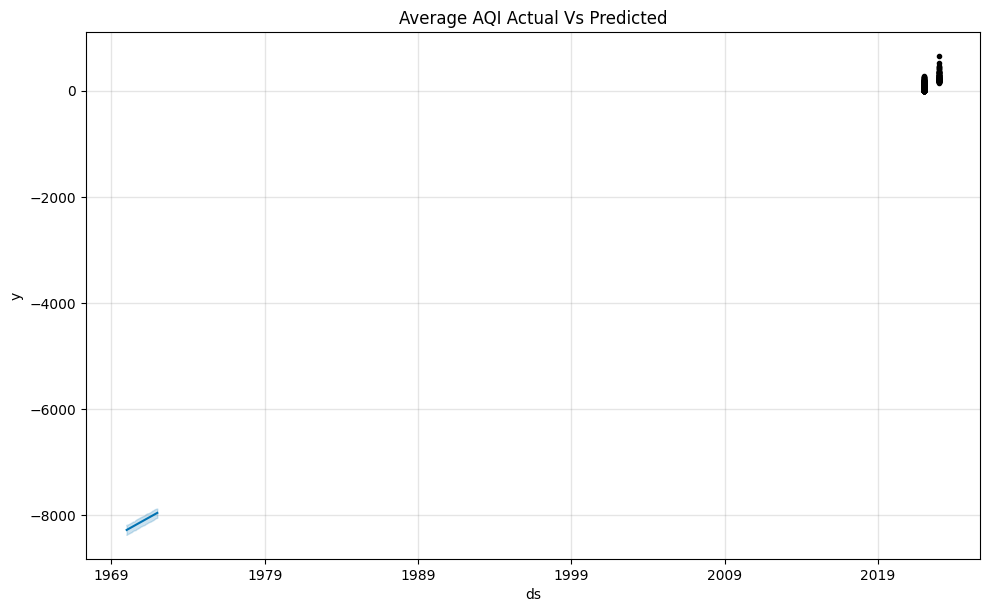

In [78]:
# Plot the graph of this data to get an understanding of how well forecast looks
model.plot(forecast);
plt.title("Average AQI Actual Vs Predicted")
plt.show()